In [128]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy 
import cmocean 
import cartopy.crs as ccrs 

In [145]:
#GOALS: 
#Correlation matrix between the ngpus and the norksy800
#Spectral analysis between the ngpus and the norkyst800
#plot f/h as contourlines with u & v
ds = xr.open_dataset(f'/lustre/storeB/project/fou/hi/foccus/experiments/ngpus-2017-24/inference/lam-48h-last.nc')

In [3]:
ds

<xarray.Dataset> Size: 5GB
Dimensions:            (time: 17, values: 3076056)
Coordinates:
  * time               (time) datetime64[ns] 136B 2024-04-02 ... 2024-04-04
Dimensions without coordinates: values
Data variables: (12/27)
    latitude           (values) float32 12MB ...
    longitude          (values) float32 12MB ...
    h                  (time, values) float32 209MB ...
    salinity_0         (time, values) float32 209MB ...
    sea_mask           (time, values) float32 209MB ...
    temperature_0      (time, values) float32 209MB ...
    ...                 ...
    rain               (time, values) float32 209MB ...
    river_binary_mask  (time, values) float32 209MB ...
    sin_julian_day     (time, values) float32 209MB ...
    sin_latitude       (time, values) float32 209MB ...
    sin_local_time     (time, values) float32 209MB ...
    sin_longitude      (time, values) float32 209MB ...

In [17]:
import numpy as np
import math

Spectral analysis

In [121]:
m = 8
n = 8

def dc_transform(matrix):
    pi = math.pi
    cos = math.cos
    dct = []
    for i in range(m):
        dct.append([None]*n)

    print(dct)
    

    for i in range(m):
        for j in range(n):
            
            if (i==0):
                beta_m = np.sqrt(1/(m))

            elif (i!=0):
                beta_m = np.sqrt(2/(m))
            
            if (j==0):
                beta_n = np.sqrt(1/(n))
            elif (j!=0):
                beta_n = np.sqrt(2/(n))

            sum = 0 
            for k in range(m):
                for l in range(n):

                    dct_sum = matrix[k][l] * cos((i+(1/2)*pi*k)/m) * cos((j+(1/2)*pi*l)/n)  
                    sum += dct_sum

            #print(sum) #skal bli en sum, men den er høyere hos meg enn eksempelkoden. Eksempelkoden har: 0.005
            
            dct[i][j] = beta_m * beta_n * sum

    for i in range(m):
        for j in range(n):
            print(dct[i][j], end = '\t')

    return dct

$f(m,n) = \beta (m) \beta (n) \cdot \sum_{i=0}^{i=N_i-1} \sum_{j=0}^{j=N_j -1} f(i,j) \times cos(\frac{(i + 1/2) \cdot \pi \cdot k}{m}) \cdot cos(\frac{(j + 1/2) \cdot \pi \cdot l}{n})$

In [125]:
#test #test
matrix = [[255, 255, 255, 255, 255, 255, 255, 255],
          [255, 255, 255, 255, 255, 255, 255, 255],
          [255, 255, 255, 255, 255, 255, 255, 255],
          [255, 255, 255, 255, 255, 255, 255, 255],
          [255, 255, 255, 255, 255, 255, 255, 255],
          [255, 255, 255, 255, 255, 255, 255, 255],
          [255, 255, 255, 255, 255, 255, 255, 255],
          [255, 255, 255, 255, 255, 255, 255, 255]]

In [126]:
dc_transform(matrix)

[[None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None]]
991.2583897573123	1247.47888049132	1073.6402116717807	883.0477464373674	678.6756164627631	463.7129804821933	241.5142585340205	15.546787357958715	1247.47888049132	1569.9272493954688	1351.1547575750521	1111.2979476680844	854.0997049709763	583.5735220388365	303.94086947649834	19.565321301634846	1073.6402116717804	1351.1547575750521	1162.8686486082008	956.4363633113057	735.0792084533606	502.25138840110617	261.58610341517794	16.838854775192935	883.0477464373669	1111.2979476680844	956.4363633113055	786.6499093934772	604.588046741436	413.09178982970155	215.14937369980066	13.84962355188492	678.675616

[[np.float64(991.2583897573123),
  np.float64(1247.47888049132),
  np.float64(1073.6402116717807),
  np.float64(883.0477464373674),
  np.float64(678.6756164627631),
  np.float64(463.7129804821933),
  np.float64(241.5142585340205),
  np.float64(15.546787357958715)],
 [np.float64(1247.47888049132),
  np.float64(1569.9272493954688),
  np.float64(1351.1547575750521),
  np.float64(1111.2979476680844),
  np.float64(854.0997049709763),
  np.float64(583.5735220388365),
  np.float64(303.94086947649834),
  np.float64(19.565321301634846)],
 [np.float64(1073.6402116717804),
  np.float64(1351.1547575750521),
  np.float64(1162.8686486082008),
  np.float64(956.4363633113057),
  np.float64(735.0792084533606),
  np.float64(502.25138840110617),
  np.float64(261.58610341517794),
  np.float64(16.838854775192935)],
 [np.float64(883.0477464373669),
  np.float64(1111.2979476680844),
  np.float64(956.4363633113055),
  np.float64(786.6499093934772),
  np.float64(604.588046741436),
  np.float64(413.091789829701

In [139]:
ds
lat = ds["latitude"]
lon = ds["longitude"]
temp = ds["temperature_0"]
salinity = ds["salinity_0"]

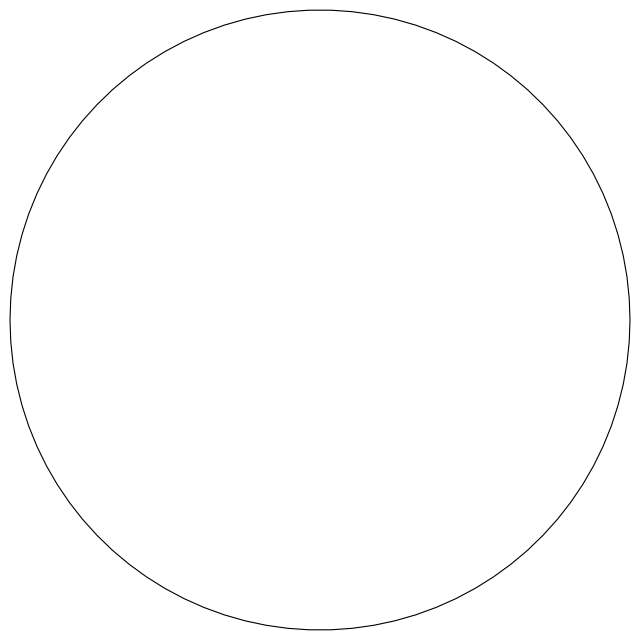

In [153]:
fig, ax = plt.subplots(figsize = (8,10), subplot_kw={"projection": ccrs.NorthPolarStereo()})
#im = ax.pcolormesh(lon, lat, c = salinity[0], cmap = cmocean.cm.thermal, transform = ccrs.PlateCarree())